In [1]:
# second eigenvector is important
# plot the eigenvalues in decreasing order
# how were the labels annotated

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('connectome_datav2.csv')

In [4]:
data.shape

(817382, 6)

In [5]:
X = data.drop(columns=['dn_hemisphere'])
y = data['dn_hemisphere']

In [6]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=22)


In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=22),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2f}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...................max_depth=None, n_estimators=100; total time= 3.0min
[CV] END ...................max_depth=None, n_estimators=100; total time= 3.0min
[CV] END ...................max_depth=None, n_estimators=100; total time= 3.0min
[CV] END ...................max_depth=None, n_estimators=100; total time= 3.0min
[CV] END ...................max_depth=None, n_estimators=100; total time= 3.0min
[CV] END .....................max_depth=10, n_estimators=100; total time= 1.7min
[CV] END ...................max_depth=None, n_estimators=200; total time= 6.1min
[CV] END ...................max_depth=None, n_estimators=200; total time= 6.2min
[CV] END ...................max_depth=None, n_estimators=200; total time= 6.2min
[CV] END ...................max_depth=None, n_estimators=200; total time= 6.2min
[CV] END ...................max_depth=None, n_estimators=200; total time= 6.2min
[CV] END .....................max_depth=10, n_est

/Users/shamanthk/Documents/Research/IS-modeling-connectomes/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END .....................max_depth=10, n_estimators=300; total time= 5.5min
[CV] END .....................max_depth=10, n_estimators=300; total time= 5.5min
[CV] END .....................max_depth=10, n_estimators=300; total time= 5.5min
[CV] END .....................max_depth=20, n_estimators=100; total time= 2.8min
[CV] END .....................max_depth=20, n_estimators=100; total time= 2.8min
[CV] END .....................max_depth=10, n_estimators=300; total time= 5.5min
[CV] END .....................max_depth=20, n_estimators=100; total time= 2.9min
[CV] END .....................max_depth=20, n_estimators=200; total time= 5.4min
[CV] END .....................max_depth=20, n_estimators=200; total time= 5.3min
[CV] END .....................max_depth=20, n_estimators=200; total time= 5.0min
[CV] END .....................max_depth=20, n_estimators=200; total time= 5.0min
[CV] END .....................max_depth=20, n_estimators=200; total time= 5.0min
[CV] END ...................

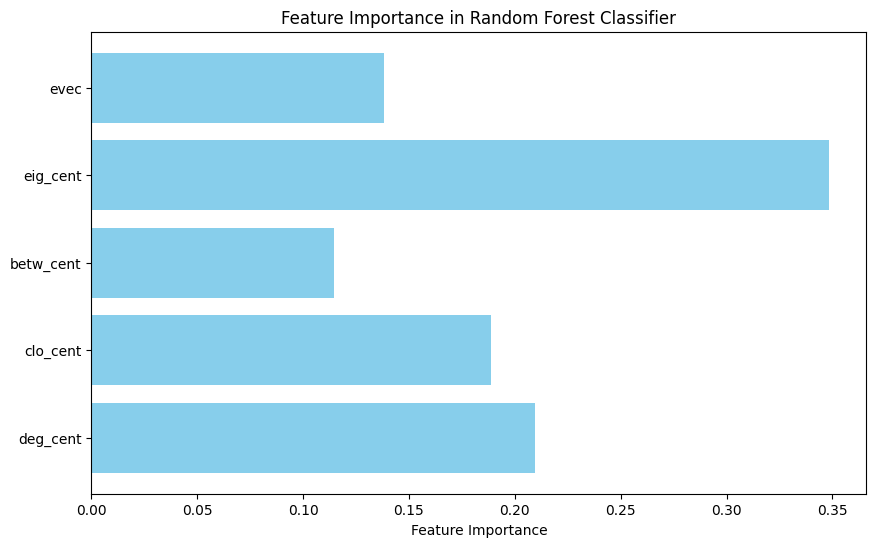

In [13]:
import matplotlib.pyplot as plt

feature_importances = best_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Classifier")
plt.show()